# Country_wide_COVID 19_Datasets ( Dynbamics Project M20 -18)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data1=pd.read_csv('covidage.csv',)

In [3]:
data2=pd.read_csv('covid19world.csv',parse_dates=['Date'])

In [4]:
# The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18,
# It also contains the population of each country to calculate per-capita penetration of the virus
# Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia).
# This is specifically relevant since COVID-19 death rate is very much age dependent.
# It's possible to use this dataset for various purposes and analyses
# Our goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age.


In [5]:
df1=pd.DataFrame(data=data1)
df2=pd.DataFrame(data=data2)
df2.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [6]:
df2.info()
# Null Values present in 'total tests','total cases','total recovered', 'serious or critical' & 'active cases'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6603 non-null   datetime64[ns]
 1   Country              6603 non-null   object        
 2   Population           6603 non-null   int64         
 3   Total Tests          5505 non-null   float64       
 4   Total Cases          6554 non-null   float64       
 5   Total Deaths         5367 non-null   float64       
 6   Total Recovered      6318 non-null   float64       
 7   Serious or Critical  4117 non-null   float64       
 8   Active Cases         6544 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [7]:
df2c=df2.copy()

In [8]:
df2c1=df2c.dropna(axis=0)
df2c1

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
...,...,...,...,...,...,...,...,...,...
6554,2020-05-18,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0
6556,2020-05-18,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0
6559,2020-05-18,Sint Maarten,42817,414.0,77.0,15.0,54.0,7.0,8.0
6560,2020-05-18,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0


In [9]:
df2c1_dates=pd.DataFrame()
df2c1_dates['month']=df2c1['Date'].dt.month_name()
df2c1_dates['year']=df2c1['Date'].dt.year
df2c1_dates['day']=df2c1['Date'].dt.day_name()
df2c1_dates['Country']=df2c1['Country']
df2c1_dates['Total Tests']=df2c1['Total Tests']
df2c1_dates['Total Cases']=df2c1['Total Cases']
df2c1_dates['Total Deaths']=df2c1['Total Deaths']
df2c1_dates['Population']=df2c1['Population']
                                  

df2c1_dates

,month,year,day,Country,Total Tests,Total Cases,Total Deaths,Population
0,April,2020,Saturday,USA,3722145.0,738792.0,39014.0,330774664
1,April,2020,Saturday,Russia,1831892.0,36793.0,313.0,145927292
2,April,2020,Saturday,Spain,930230.0,194416.0,20043.0,46752703
3,April,2020,Saturday,Brazil,62985.0,36722.0,2361.0,212380932
5,April,2020,Saturday,Italy,1305833.0,175925.0,23227.0,60471924
...,...,...,...,...,...,...,...,...
6554,May,2020,Monday,Bahamas,1826.0,96.0,11.0,392795
6556,May,2020,Monday,Barbados,4004.0,88.0,7.0,287335
6559,May,2020,Monday,Sint Maarten,414.0,77.0,15.0,42817
6560,May,2020,Monday,Malawi,1803.0,70.0,3.0,19066433


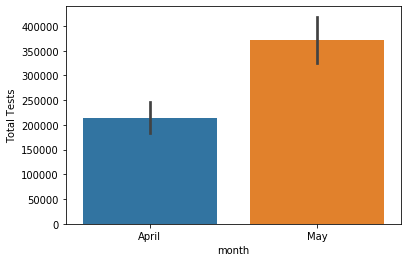

In [10]:
sns.barplot(x='month',y='Total Tests',data=df2c1_dates)
# so we can observe number of 'Total Test' have gone up 

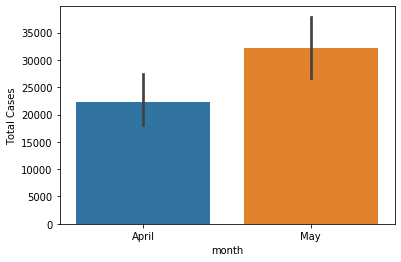

In [11]:
sns.barplot(x='month',y='Total Cases',data=df2c1_dates)
# so we can observe number of 'Total cases' have gone up 

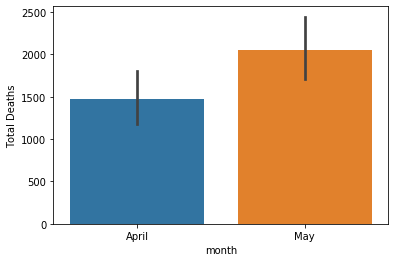

In [12]:
sns.barplot(x='month',y='Total Deaths',data=df2c1_dates)
# Unfortunately Number of fatality have also gone up 

# Country Wise - Death Ratio & Penetration Ratio

In [13]:
df_country=df2c1[df2c1['Country']=='USA']
ct=df_country['Total Tests'].sum()
cd=df_country['Total Deaths'].sum()
cs1=cd/ct
print('Death Ratio :',cs1)
print('\n')

# Using this formula we can calcualte the Death Ratio of any given country in the dataset

cp=df_country['Population'].sum()
cc=df_country['Total Cases'].sum()
pr=cc/cp
print('Penetration Ratio:',pr)

# Using this formula we can calcualte the Penetration Ratio of any given country in the dataset


Death Ratio : 0.009062019223829177


Penetration Ratio: 0.003529983569213929


# Month Wise - Death Ratio & Penetration Ratio

In [14]:
df_month=df2c1_dates[df2c1_dates['month']=='April']
ct=df_month['Total Tests'].sum()
cd=df_month['Total Deaths'].sum()
dr=cd/ct
print('Monthy Death Ratio:',dr)
print('\n')

# Using this formula we can calcualte the Death Ratio of any given month in the dataset

cp=df_month['Population'].sum()
cc=df_month['Total Cases'].sum()
pr=cc/cp
print('Monthly Penetration Ratio:',pr)

# Using this formula we can calcualte the Penetration Ratio of any given month in the dataset


Monthy Death Ratio: 0.006907142237260684


Monthly Penetration Ratio: 0.0007393796811850521
